## Introducción

En este notebook se realizará todo el análisis visual asociado a los restaurantes de Estados Unidos. Para ello, se hará uso de diversas librerías que facilitan esta tarea.

## Para montar el drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/AnalisisDeDatos/PracticaFinal/

/content/drive/MyDrive/AnalisisDeDatos/PracticaFinal


## Dependencias y utilidades

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport
import IPython

In [ ]:
!pip install pandas-profiling==2.7.1

In [ ]:
%matplotlib inline

## Análisis Visual - Restaurantes

In [ ]:
restaurants = pd.read_csv('data/business/segmentation/eeuu/with_attributes/business_filtered_eeuu_categorized.csv', sep=",")
restaurants

,business_id,city,num_reviews,open,rating,zipcode,GoodForKids,NoiseLevel,RestaurantsDelivery,Caters,WiFi,RestaurantsGoodForGroups,OutdoorSeating,HasTV,RestaurantsReservations,RestaurantsPriceRange2
0,gnKjwL_1w79qoiV3IC_xQQ,Charlotte,170.0,1.0,4.0,28210.0,True,average,False,False,no,True,False,True,True,2
1,1Dfx3zM-rW4n-31KeC8sJg,Phoenix,18.0,1.0,3.0,85016.0,True,None,False,None,no,True,False,False,False,1
2,fweCYi8FmbJXHCqLnwuk8w,Mentor-on-the-Lake,16.0,1.0,4.0,44060.0,True,None,True,None,None,True,False,None,False,2
3,PZ-LZzSlhSe9utkQYU8pFg,Las Vegas,40.0,0.0,4.0,89119.0,True,quiet,False,True,no,True,False,False,True,2
4,1RHY4K3BD22FK7Cfftn8Mg,Pittsburgh,35.0,1.0,4.0,15231.0,True,None,False,None,None,True,False,False,False,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35821,cfrN6-lQC-dzjBtNBjefpQ,Kent,3.0,0.0,2.5,44240.0,True,None,None,None,None,None,None,None,None,2
35822,JsRt9LPgv-7guVcY4u6OQA,Huntersville,142.0,1.0,4.5,28078.0,True,average,False,True,no,True,True,False,False,2
35823,7wZgquJ30qkVQbvbJo92ow,Madison,6.0,1.0,3.5,53717.0,None,None,None,None,None,None,None,None,None,None
35824,ghovD5ZTGDQ5Q2U4ERddWw,Fairlawn,22.0,1.0,4.0,44333.0,True,loud,False,False,no,True,False,False,False,2


In [ ]:
prof = ProfileReport(restaurants)
prof.to_file(output_file='analysis/restaurants.html')

In [ ]:
IPython.display.HTML(filename='analysis/business_test.html')

In [ ]:
restaurants.describe()

,num_reviews,open,rating,zipcode
count,35826.000000,35826.000000,35826.000000,35826.000000
mean,92.351002,0.697008,3.436568,62479.063418
std,218.222034,0.459558,0.817048,27891.888866
min,3.000000,0.000000,1.000000,5440.000000
25%,10.000000,0.000000,3.000000,44022.000000
50%,30.000000,1.000000,3.500000,85016.000000
75%,90.000000,1.000000,4.000000,85331.000000
max,8348.000000,1.000000,5.000000,93013.000000


El código superior muestra un análisis descriptivo simple de las variables continuas de los restaurantes. De la información mostrada pueden sacarse varias conclusiones. En primer lugar, el número de reviews u opiniones (`num_reviews`) muestra una desviación estándar de 218, lo cual es muy grande si observamos la media, la cual es de tan solo 92. Además, se puede observer que el número máximo de reviews que presenta el set de datos es de 8348, número considerablemente mayor que la media, por lo que podemos preveer que habrá datos atípicos u outliers. En cuanto a la variables que aporta información sobre los negocios abiertos o cerrados (`open`), lo cierto es que no se logra detectar ninguna anomalía, aunque sí que será una variable útil para demostrar si los negocios abiertos son sínonimo de que tienen éxito y, por contrapartida, si los negocios cerrados implican que no han tenido éxito. En cuanto al rating, si observamos detenidamente la media y los percentiles, podemos ver que los valores están balanceados. Por último, el código postal o `zipcode` no nos aporta demasiada información, aunque sí que será útil para realizar ciertas segmentaciones.

#### Número de reviews

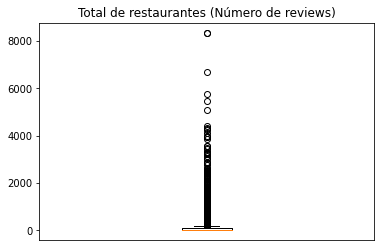

In [ ]:
plt.boxplot(restaurants.num_reviews)
plt.title("Total de restaurantes (Número de reviews)")
plt.xticks([])
plt.show()

El código superior muestra un diagrama de cajas relativo al número de reviews u opiniones de los restaurantes. Como puede verse, la forma del diagrama no aporta demasiada información. Los datos están distribuidos en rangos de número de reviews muy pequeños y, además, tenemos una gran cantidad de outliers o datos atípicos. Esto puede ser indicativo de que los datos presentan varias distribuciones o que simplementa hay varios outliers que deben ser estudiados. En cualquier caso, en los siguientes diagramas se analizará este caso.

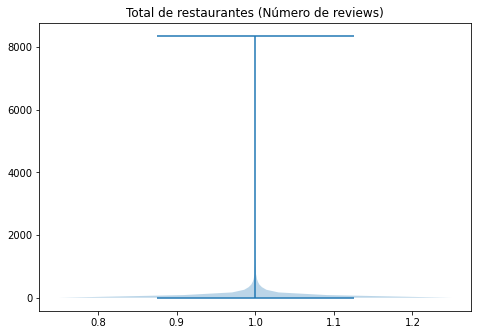

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
bp = ax.violinplot(restaurants.num_reviews)
plt.title("Total de restaurantes (Número de reviews)")
plt.show()

El diagrama de violín superior no deja constancia de que existan otras distribuciones en los datos, por lo que podemos concluir que existe una gran cantidad de datos atípicos pero no siguen ninguna distribución.

Por tanto, se debe proceder a realizar una pequeña segmentación de esta variable para estudiar el segmento de los datos donde se encuentra los números de reviews más comunes.

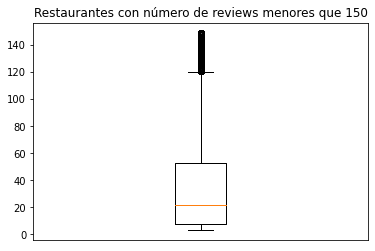

In [ ]:
restaurants_aux = restaurants[(restaurants.num_reviews < 150)]
plt.boxplot(restaurants_aux.num_reviews)
plt.title("Restaurantes con número de reviews menores que 150")
plt.xticks([])
plt.show()

A modo de experimento, se han extraído aquellos restaurantes en los que el número de reviews sea menor a 150. Como puede verse, ahora el diagrama es mucho más legible y puede extraerse la conclusion de que la mayor parte de los restaurantes de Estados Unidos tienen un número de reviews bastante reducido.

A continuación, se realizará un análisis visual de 7 zonas distintas de EEUU. Esta segmentación se realizará a través de los códigos postales o zipcodes

In [ ]:
restaurants_AZ = restaurants[(restaurants.zipcode >= 85001) & (restaurants.zipcode <= 86556)]
restaurants_NV = restaurants[(restaurants.zipcode >= 88901) & (restaurants.zipcode <= 89883)]
restaurants_WI = restaurants[(restaurants.zipcode >= 53001) & (restaurants.zipcode <= 54990)]
restaurants_IL = restaurants[(restaurants.zipcode >= 60001) & (restaurants.zipcode <= 62999)]
restaurants_NC = restaurants[(restaurants.zipcode >= 27006) & (restaurants.zipcode <= 28909)]
restaurants_PA = restaurants[(restaurants.zipcode >= 15001) & (restaurants.zipcode <= 19640)]
restaurants_OH = restaurants[(restaurants.zipcode >= 43001) & (restaurants.zipcode <= 45999)]

In [ ]:
restaurants_states = [restaurants_AZ,restaurants_NV,restaurants_WI,restaurants_IL,restaurants_NC,restaurants_PA,restaurants_OH]
names = ['Restaurantes Arizona (rating)','Restaurantes Nevada (rating)'
,'Restaurantes Wisconsin (rating)','Restaurantes Illinois (rating)'
,'Restaurantes North Carolina (rating)', 
'Restaurantes Pennsylvania (rating)',
'Restaurantes Ohio (rating)']
ratings = ['1', '1.5','2','2.5','3','3.5','4','4.5','5']

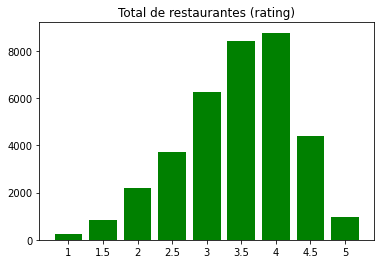

In [ ]:
plt.bar(ratings, restaurants.rating.value_counts().sort_index(), color="green")
plt.title("Total de restaurantes (rating)")
plt.show()


El código superior muestra un diagrama de barras para el rating de todos los restaurantes extraídos para Estados Unidos. Como puede verse, los datos siguen una distribución normal ligeramente desplazada hacia la derecha, lo que parece indicar que hay cierta tendencia hacia reviews con puntuaciones altas.




No obstante, no tiene demasiado sentido analizar los ratings de esta forma, puesto que no se tienen datos que se distribuyen uniformemente a lo largo de todo Estados Unidos, aunque se ha realizado de todas formas para observar de manera general la distribución de los datos. Por tanto, se deben obtener concentraciones de datos en ciertas regiones, lo que ha podido verse en el cuaderno de MapasSinFiltrar-AD. Por ello, compararemos los ratings de cada una de estas zonas para ver si siguen alguna tendencia común o, por el contrario, deben ser analizadas de manera independiente.

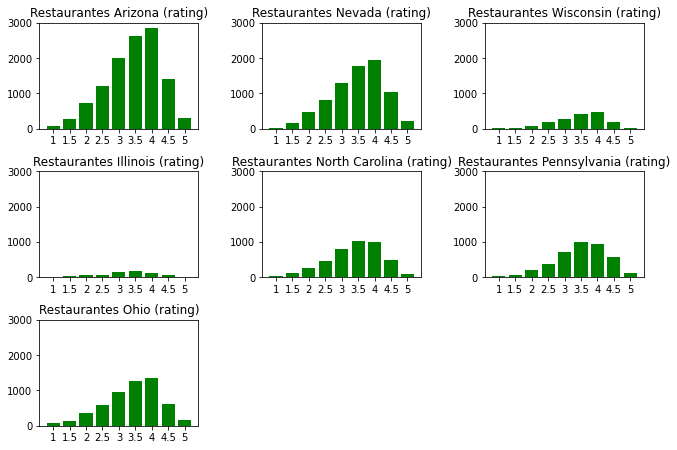

In [ ]:
for i, h in enumerate(restaurants_states):
    figure = plt.subplot(3,3,i+1)
    plt.bar(ratings, h.rating.value_counts().sort_index(), color="green")
    plt.title(names[i])
    plt.ylim([0, 3000])
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=1.5, 
                    top=1.5, 
                    wspace=0.4, 
                    hspace=0.4)
plt.show()

El código superior muestra una comparación entre las distribuciones de ratings de las distintas zonas de Estados Unidos elegidas. Comoo puede observarse, las zonas muestran distribuciones similares, que pueden aproximarse a una distribución normal. Sin embargo, podemos ver que las zonas no contienen el mismo número de negocios. Por estas razones parece oportuno realizar las predicciones para cada una de estas zonas, dado el hecho de que poseen distribuciones parecidas.

Text(0, 0.5, 'Número de reviews')

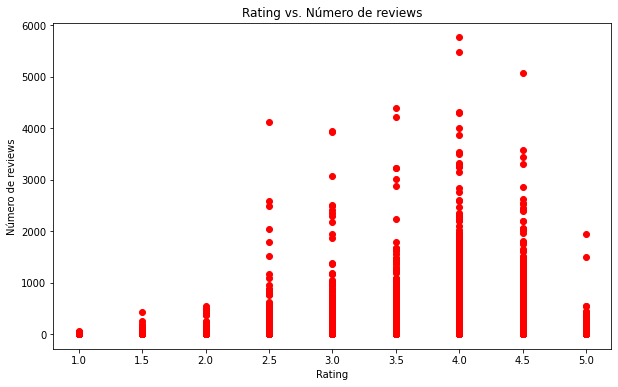

In [ ]:
restaurants_aux = restaurants[restaurants.num_reviews < 6000]
fig, ax = plt.subplots(figsize=(10, 6))
ax.scatter(x = restaurants_aux['rating'], y = restaurants_aux['num_reviews'], color = 'red')
plt.title("Rating vs. Número de reviews")
plt.xlabel("Rating")
plt.ylabel("Número de reviews")

El diagrama superior muestra un diagrama de dispersión que relaciona las variables `rating` y `num_reviews`. El objetivo de esta evaluación es estudiar si ambas variables presentan alguna correlación, puesto que se suele pensar que cuantas más opiniones tiene un restaurante mayor será su puntuación. La teoría se confirma. Como se ve en el diagrama, el rating es mejor cuanto mayor es el número de opiniones realizadas a los restaurantes.

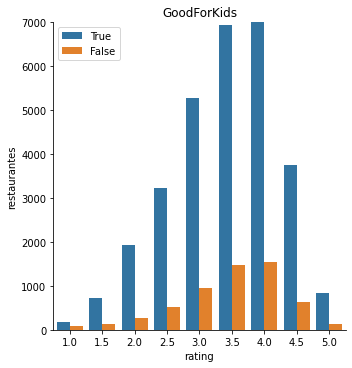

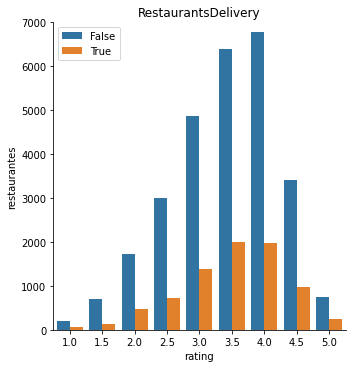

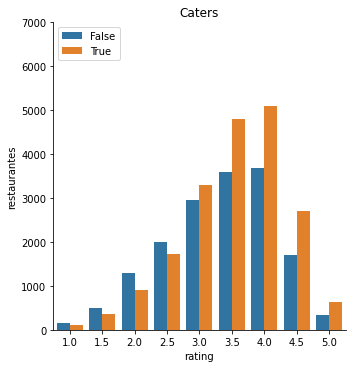

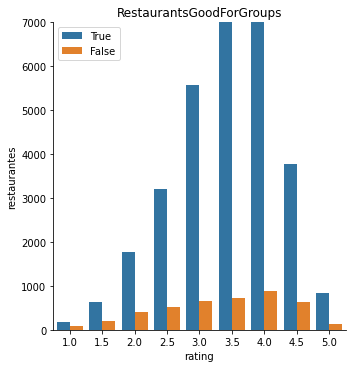

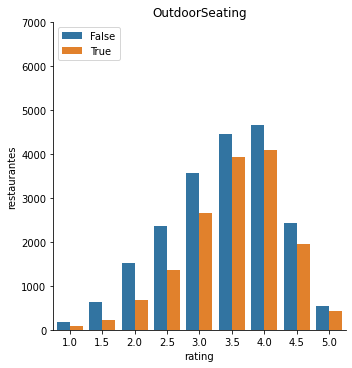

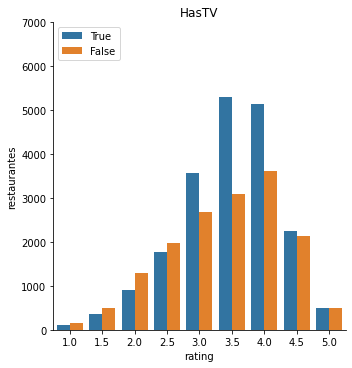

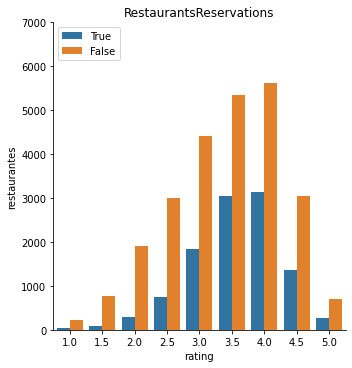

In [ ]:
attributes = ["GoodForKids", "RestaurantsDelivery", "Caters", "RestaurantsGoodForGroups", "OutdoorSeating", "HasTV", "RestaurantsReservations"]

for i, a in enumerate(attributes):
  g = sns.catplot(x='rating',hue=a,data=restaurants,kind="count",legend = False)
  g.set(ylim=(0, 7000), ylabel='restaurantes', title=a)
  plt.legend(loc='upper left')